In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
traindata=pd.read_csv("train.csv")

In [3]:
traindata.columns

Index(['Unnamed: 0', 'ambient', 'coolant', 'u_d', 'u_q', 'motor_speed',
       'torque', 'i_d', 'i_q', 'pm', 'stator_yoke', 'stator_tooth',
       'stator_winding', 'profile_id'],
      dtype='object')

In [4]:
traindata=traindata.drop("profile_id",axis=1)

In [5]:
traindata=traindata.drop("Unnamed: 0",axis=1)

In [68]:
traindata.skew()

ambient          -0.847203
coolant           0.628235
u_d               0.195220
u_q               0.199884
motor_speed       0.332818
torque           -0.043587
i_d              -0.621576
i_q              -0.076394
pm               -0.231477
stator_yoke       0.257320
stator_tooth     -0.061245
stator_winding   -0.028170
dtype: float64

In [69]:
traindata.kurtosis()

ambient           0.817875
coolant          -0.759152
u_d              -0.522275
u_q              -1.271397
motor_speed      -1.168514
torque            0.781184
i_d              -0.755862
i_q               0.787067
pm               -0.346942
stator_yoke      -0.729991
stator_tooth     -0.780470
stator_winding   -0.729009
dtype: float64

In [70]:
traindata.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
ambient,1.000000,0.434070,0.195035,0.087877,0.078842,-0.262591,0.005567,-0.260852,0.501772,0.451555,0.396907,0.302270
coolant,0.434070,1.000000,0.178710,0.027681,-0.032963,-0.189276,0.107858,-0.185776,0.430885,0.874034,0.689205,0.509759
u_d,0.195035,0.178710,1.000000,-0.027819,-0.234200,-0.821098,0.358674,-0.796324,-0.082117,0.041710,-0.065836,-0.150296
u_q,0.087877,0.027681,-0.027819,1.000000,0.717111,-0.037028,-0.182545,-0.026160,0.101475,0.106183,0.149082,0.125601
motor_speed,0.078842,-0.032963,-0.234200,0.717111,1.000000,0.024583,-0.723145,0.006349,0.332852,0.182961,0.334283,0.393611
torque,-0.262591,-0.189276,-0.821098,-0.037028,0.024583,1.000000,-0.238838,0.996565,-0.073057,-0.092276,-0.011416,0.080399
i_d,0.005567,0.107858,0.358674,-0.182545,-0.723145,-0.238838,1.000000,-0.204010,-0.299330,-0.180409,-0.388120,-0.540351
i_q,-0.260852,-0.185776,-0.796324,-0.026160,0.006349,0.996565,-0.204010,1.000000,-0.086657,-0.098888,-0.025615,0.060306
pm,0.501772,0.430885,-0.082117,0.101475,0.332852,-0.073057,-0.299330,-0.086657,1.000000,0.695267,0.768570,0.729916
stator_yoke,0.451555,0.874034,0.041710,0.106183,0.182961,-0.092276,-0.180409,-0.098888,0.695267,1.000000,0.949960,0.845375


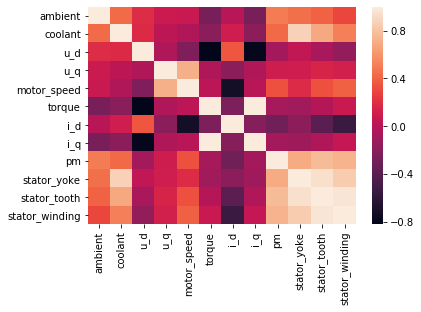

In [71]:
corr = traindata.corr()
ax = sns.heatmap(corr)

In [72]:
traindata.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
count,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000,698649.000000
mean,-0.003129,0.004779,0.004275,-0.005819,-0.006024,-0.002985,0.005794,-0.002809,-0.004385,0.000623,-0.002212,-0.003988
std,0.992710,1.002086,0.997729,1.002404,1.001700,0.997403,0.999005,0.997375,0.995450,1.001119,0.999732,0.998443
min,-7.968341,-1.367800,-1.654878,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973
25%,-0.598182,-1.037856,-0.827631,-0.927994,-0.951892,-0.266604,-0.756753,-0.257268,-0.671621,-0.747074,-0.761951,-0.725651
50%,0.266325,-0.176651,0.267501,-0.099512,-0.140246,-0.187167,0.213188,-0.188490,0.094138,-0.057264,0.005240,0.006893
75%,0.686697,0.648482,0.358460,0.852677,0.855411,0.547458,1.013975,0.499623,0.680431,0.697432,0.772349,0.725208
max,2.967117,2.649032,2.274734,1.793498,2.024151,3.016895,1.060937,2.914185,2.917456,2.449158,2.326668,2.651810


In [73]:
traindata.head(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
2,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
3,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145
4,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-2.522203,-1.831931,-2.062549,-2.017884
5,-0.738450,-1.113986,0.336256,-1.305155,-1.222432,-0.248321,1.030107,-0.246035,-2.522844,-1.832182,-2.061953,-2.017213
6,-0.727130,-1.109486,0.335988,-1.305633,-1.222431,-0.248294,1.029636,-0.245888,-2.522677,-1.831438,-2.062317,-2.018180
7,-0.704877,-1.109986,0.336241,-1.305820,-1.222434,-0.248002,1.029318,-0.245780,-2.522214,-1.832052,-2.062118,-2.017589
8,-0.682534,-1.111362,0.335566,-1.303240,-1.222430,-0.247513,1.029274,-0.245775,-2.521926,-1.832031,-2.061756,-2.017257
9,-0.620099,-1.114285,0.335909,-1.305675,-1.222430,-0.247884,1.029211,-0.245729,-2.522311,-1.831778,-2.061331,-2.017632


In [74]:
np.shape(traindata)

(698649, 12)

In [75]:
traindata.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
dtype: int64

(array([1.00000e+00, 1.00000e+00, 2.00000e+00, 1.60000e+01, 2.70330e+04,
        3.60860e+04, 1.51692e+05, 4.03874e+05, 7.09580e+04, 8.98600e+03]),
 array([-7.9683414, -6.8747956, -5.7812498, -4.687704 , -3.5941582,
        -2.5006124, -1.4070666, -0.3135208,  0.780025 ,  1.8735708,
         2.9671166]),
 <a list of 10 Patch objects>)

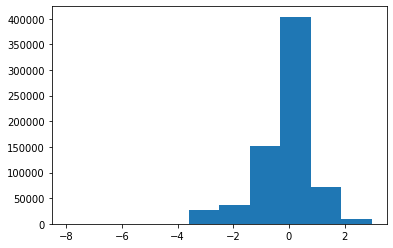

In [76]:
plt.hist(traindata.ambient)

(array([190969.,  95096.,  64987.,  73370.,  99452.,  50818.,  37831.,
         41932.,  43032.,   1162.]),
 array([-1.3677999 , -0.96611671, -0.56443352, -0.16275033,  0.23893286,
         0.64061605,  1.04229924,  1.44398243,  1.84566562,  2.24734881,
         2.649032  ]),
 <a list of 10 Patch objects>)

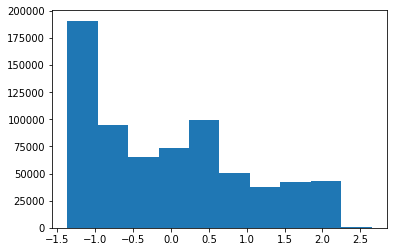

In [77]:
plt.hist(traindata.coolant)

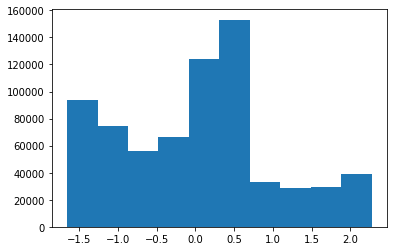

In [78]:
plt.hist(traindata.u_d)
plt.show()

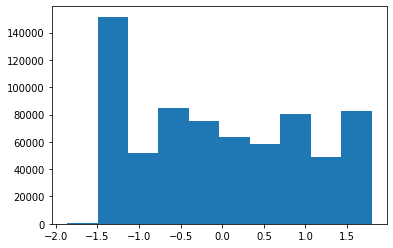

In [79]:
plt.hist(traindata.u_q)
plt.show()

(array([160838.,  66960.,  78452.,  65333.,  67894.,  52579.,  60559.,
         50384.,  60232.,  35418.]),
 array([-1.3715293 , -1.03196131, -0.69239332, -0.35282533, -0.01325734,
         0.32631065,  0.66587864,  1.00544663,  1.34501462,  1.68458261,
         2.0241506 ]),
 <a list of 10 Patch objects>)

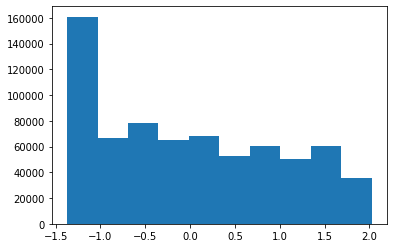

In [80]:
plt.hist(traindata.motor_speed)

(array([  5030.,  16097.,  38842.,  54480., 238248., 157237., 103926.,
         51295.,  23166.,  10328.]),
 array([-3.345953  , -2.70966822, -2.07338344, -1.43709866, -0.80081388,
        -0.1645291 ,  0.47175568,  1.10804046,  1.74432524,  2.38061002,
         3.0168948 ]),
 <a list of 10 Patch objects>)

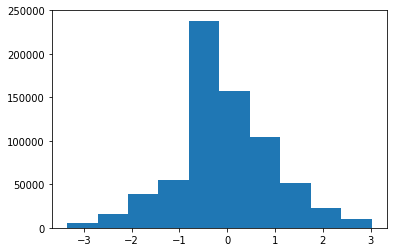

In [81]:
plt.hist(traindata.torque)

(array([   568.,   4859.,  22120.,  37300.,  46254.,  80108.,  84917.,
         71680.,  71750., 279093.]),
 array([-3.2458737 , -2.81519261, -2.38451152, -1.95383043, -1.52314934,
        -1.09246825, -0.66178716, -0.23110607,  0.19957502,  0.63025611,
         1.0609372 ]),
 <a list of 10 Patch objects>)

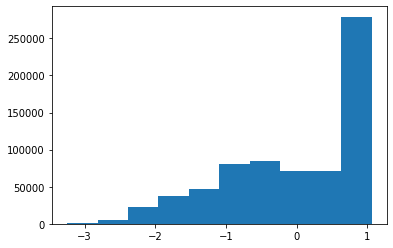

In [82]:
plt.hist(traindata.i_d)

(array([  5332.,  16259.,  36950.,  52308., 235998., 141114., 115659.,
         55635.,  26166.,  13228.]),
 array([-3.341639  , -2.71605664, -2.09047428, -1.46489192, -0.83930956,
        -0.2137272 ,  0.41185516,  1.03743752,  1.66301988,  2.28860224,
         2.9141846 ]),
 <a list of 10 Patch objects>)

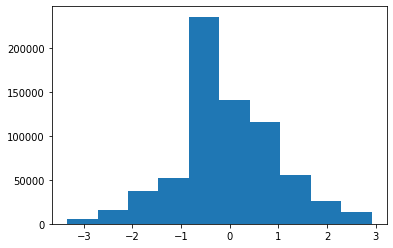

In [83]:
plt.hist(traindata.i_q)

(array([ 14067.,  49541.,  61257.,  94054., 146247., 162433., 100686.,
         55775.,  11768.,   2821.]),
 array([-2.6319911 , -2.07704637, -1.52210164, -0.96715691, -0.41221218,
         0.14273255,  0.69767728,  1.25262201,  1.80756674,  2.36251147,
         2.9174562 ]),
 <a list of 10 Patch objects>)

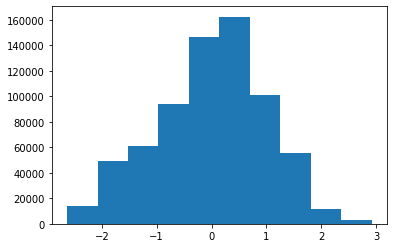

In [84]:
plt.hist(traindata.pm)

(array([ 63562.,  61830., 100873., 106266., 114539.,  81344.,  58719.,
         59471.,  36249.,  15796.]),
 array([-1.8346876 , -1.40630304, -0.97791848, -0.54953392, -0.12114936,
         0.3072352 ,  0.73561976,  1.16400432,  1.59238888,  2.02077344,
         2.449158  ]),
 <a list of 10 Patch objects>)

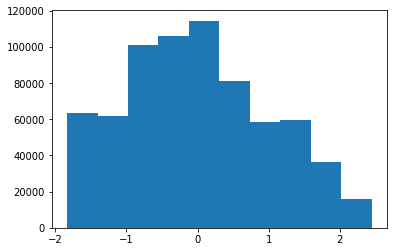

In [85]:
plt.hist(traindata.stator_yoke)

(array([ 48292.,  53137.,  81108.,  78299., 120024.,  99854.,  91668.,
         76290.,  35813.,  14164.]),
 array([-2.0661428 , -1.62686172, -1.18758064, -0.74829956, -0.30901848,
         0.1302626 ,  0.56954368,  1.00882476,  1.44810584,  1.88738692,
         2.326668  ]),
 <a list of 10 Patch objects>)

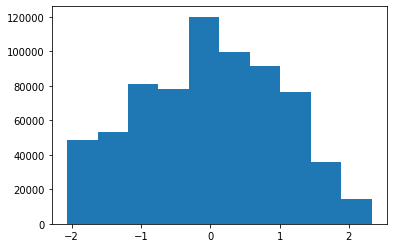

In [86]:
plt.hist(traindata.stator_tooth)

(array([ 59712.,  56736.,  75243., 113968., 121707., 108009.,  79496.,
         56803.,  24584.,   2391.]),
 array([-2.0199726 , -1.55279439, -1.08561618, -0.61843797, -0.15125976,
         0.31591845,  0.78309666,  1.25027487,  1.71745308,  2.18463129,
         2.6518095 ]),
 <a list of 10 Patch objects>)

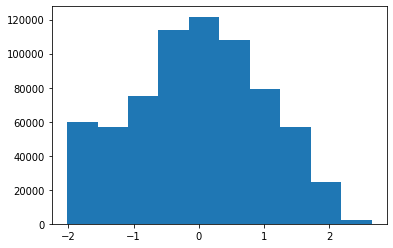

In [87]:
plt.hist(traindata.stator_winding)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c04318630>,
 'caps': [<matplotlib.lines.Line2D at 0x22c04318d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c04318240>],
 'medians': [<matplotlib.lines.Line2D at 0x22c04323400>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c04323748>],
 'means': []}

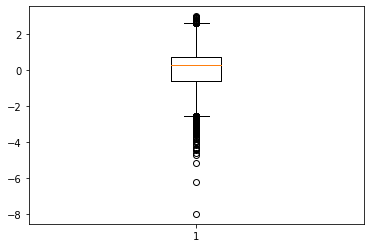

In [88]:
plt.boxplot(traindata.ambient)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c04374f28>,
 'caps': [<matplotlib.lines.Line2D at 0x22c04380668>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c04374b38>],
 'medians': [<matplotlib.lines.Line2D at 0x22c04380cf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c04380dd8>],
 'means': []}

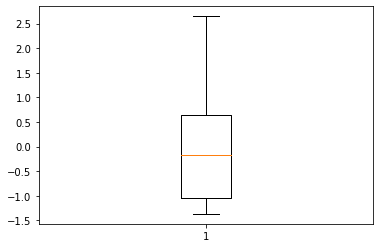

In [89]:
plt.boxplot(traindata.coolant)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c043e3940>,
 'caps': [<matplotlib.lines.Line2D at 0x22c043e3dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c043e3550>],
 'medians': [<matplotlib.lines.Line2D at 0x22c043ee710>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c043eea58>],
 'means': []}

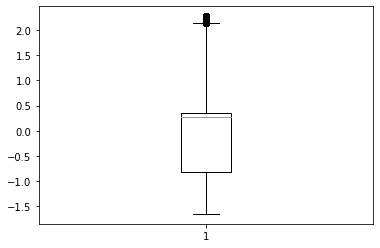

In [90]:
plt.boxplot(traindata.u_d)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c60a2aeb8>,
 'caps': [<matplotlib.lines.Line2D at 0x22c60a349b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c60a2a860>],
 'medians': [<matplotlib.lines.Line2D at 0x22c60a34550>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c60a34e48>],
 'means': []}

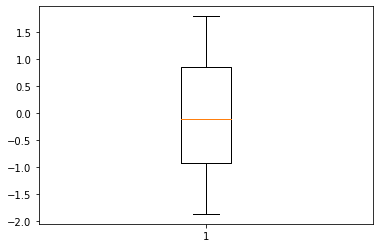

In [91]:
plt.boxplot(traindata.u_q)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c60efc828>,
 'caps': [<matplotlib.lines.Line2D at 0x22c60a7d828>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c60633be0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c60a7d978>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c60a7d278>],
 'means': []}

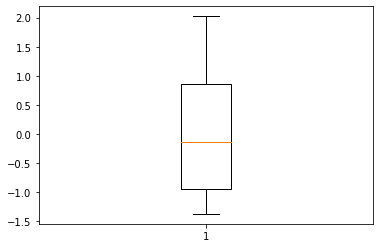

In [92]:
plt.boxplot(traindata.motor_speed)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c5db84550>,
 'caps': [<matplotlib.lines.Line2D at 0x22c5db9d240>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c5db84c88>],
 'medians': [<matplotlib.lines.Line2D at 0x22c5db9da90>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c5db8b6d8>],
 'means': []}

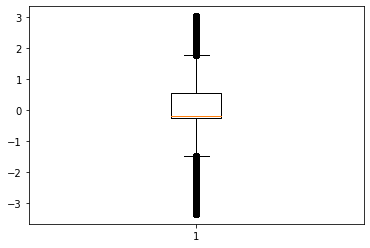

In [93]:
plt.boxplot(traindata.torque)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c6061ff98>,
 'caps': [<matplotlib.lines.Line2D at 0x22c606026d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c6061fba8>],
 'medians': [<matplotlib.lines.Line2D at 0x22c60602d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c60602e48>],
 'means': []}

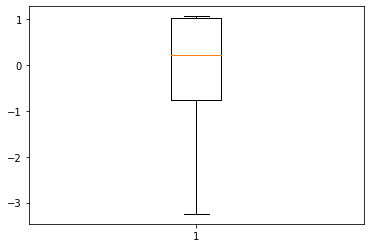

In [94]:
plt.boxplot(traindata.i_d)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c5db1c390>,
 'caps': [<matplotlib.lines.Line2D at 0x22c5db1ca90>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c5db22f60>],
 'medians': [<matplotlib.lines.Line2D at 0x22c5db1ceb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c5db4b4a8>],
 'means': []}

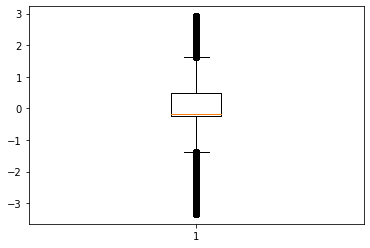

In [95]:
plt.boxplot(traindata.i_q)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c04464eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x22c04471898>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c04464d68>],
 'medians': [<matplotlib.lines.Line2D at 0x22c04471f28>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c0447c2b0>],
 'means': []}

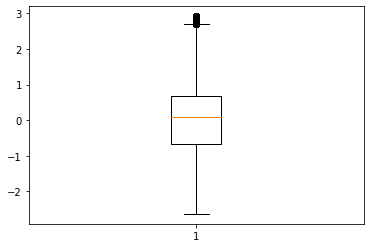

In [96]:
plt.boxplot(traindata.pm)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c044c9a90>,
 'caps': [<matplotlib.lines.Line2D at 0x22c044c9f28>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c044c96a0>],
 'medians': [<matplotlib.lines.Line2D at 0x22c044d4860>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c044d4ba8>],
 'means': []}

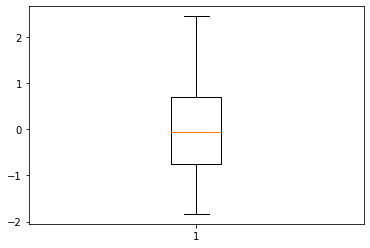

In [97]:
plt.boxplot(traindata.stator_yoke)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c04523e48>,
 'caps': [<matplotlib.lines.Line2D at 0x22c04532588>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c04523a58>],
 'medians': [<matplotlib.lines.Line2D at 0x22c04532c18>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c04532f60>],
 'means': []}

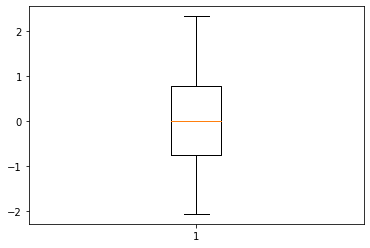

In [98]:
plt.boxplot(traindata.stator_tooth)

{'whiskers': [<matplotlib.lines.Line2D at 0x22c08ec0f60>,
 'caps': [<matplotlib.lines.Line2D at 0x22c08ecf940>,
 'boxes': [<matplotlib.lines.Line2D at 0x22c08ec0e10>],
 'medians': [<matplotlib.lines.Line2D at 0x22c08ecffd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22c08ed9358>],
 'means': []}

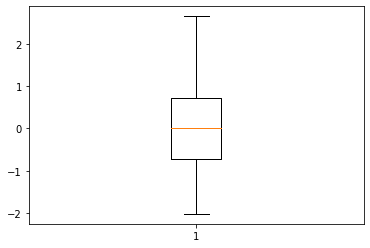

In [99]:
plt.boxplot(traindata.stator_winding)

In [6]:
from sklearn.preprocessing import scale
train_norm = pd.DataFrame(scale(traindata))

In [7]:
train_norm.columns=traindata.columns

In [102]:
train_norm.head(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.754516,-1.120888,0.324398,-1.288941,-1.214340,-0.247841,1.024799,-0.243691,-2.529196,-1.829997,-2.064486,-2.017188
1,-0.785490,-1.119127,0.329245,-1.292896,-1.214340,-0.247088,1.024674,-0.243648,-2.529801,-1.828977,-2.062416,-2.016498
2,-0.783519,-1.119210,0.330175,-1.292926,-1.214342,-0.246291,1.028074,-0.244788,-2.528762,-1.828910,-2.061479,-2.016787
3,-0.776576,-1.119221,0.331685,-1.294189,-1.214341,-0.246356,1.027036,-0.244442,-2.529024,-1.829074,-2.061137,-2.017300
4,-0.765388,-1.119400,0.331380,-1.294088,-1.214341,-0.245851,1.026259,-0.244173,-2.529328,-1.830506,-2.060892,-2.017039
5,-0.740722,-1.116438,0.332738,-1.296221,-1.214344,-0.245975,1.025334,-0.243866,-2.529972,-1.830757,-2.060295,-2.016367
6,-0.729318,-1.111947,0.332469,-1.296698,-1.214343,-0.245948,1.024862,-0.243718,-2.529804,-1.830014,-2.060659,-2.017335
7,-0.706902,-1.112445,0.332723,-1.296884,-1.214346,-0.245655,1.024544,-0.243610,-2.529340,-1.830627,-2.060461,-2.016744
8,-0.684396,-1.113819,0.332045,-1.294310,-1.214342,-0.245164,1.024500,-0.243606,-2.529050,-1.830605,-2.060098,-2.016411
9,-0.621502,-1.116736,0.332390,-1.296740,-1.214342,-0.245537,1.024437,-0.243560,-2.529436,-1.830354,-2.059673,-2.016787


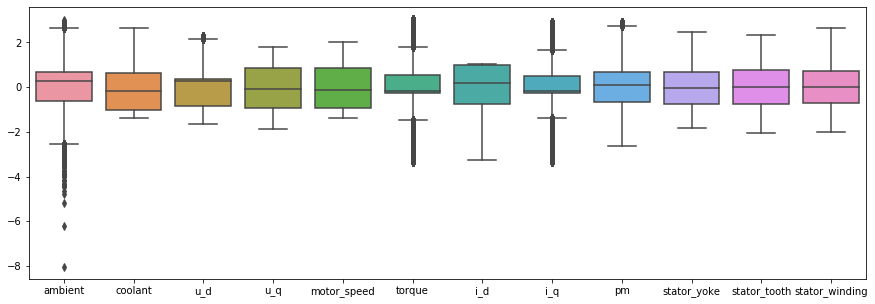

In [104]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_norm)

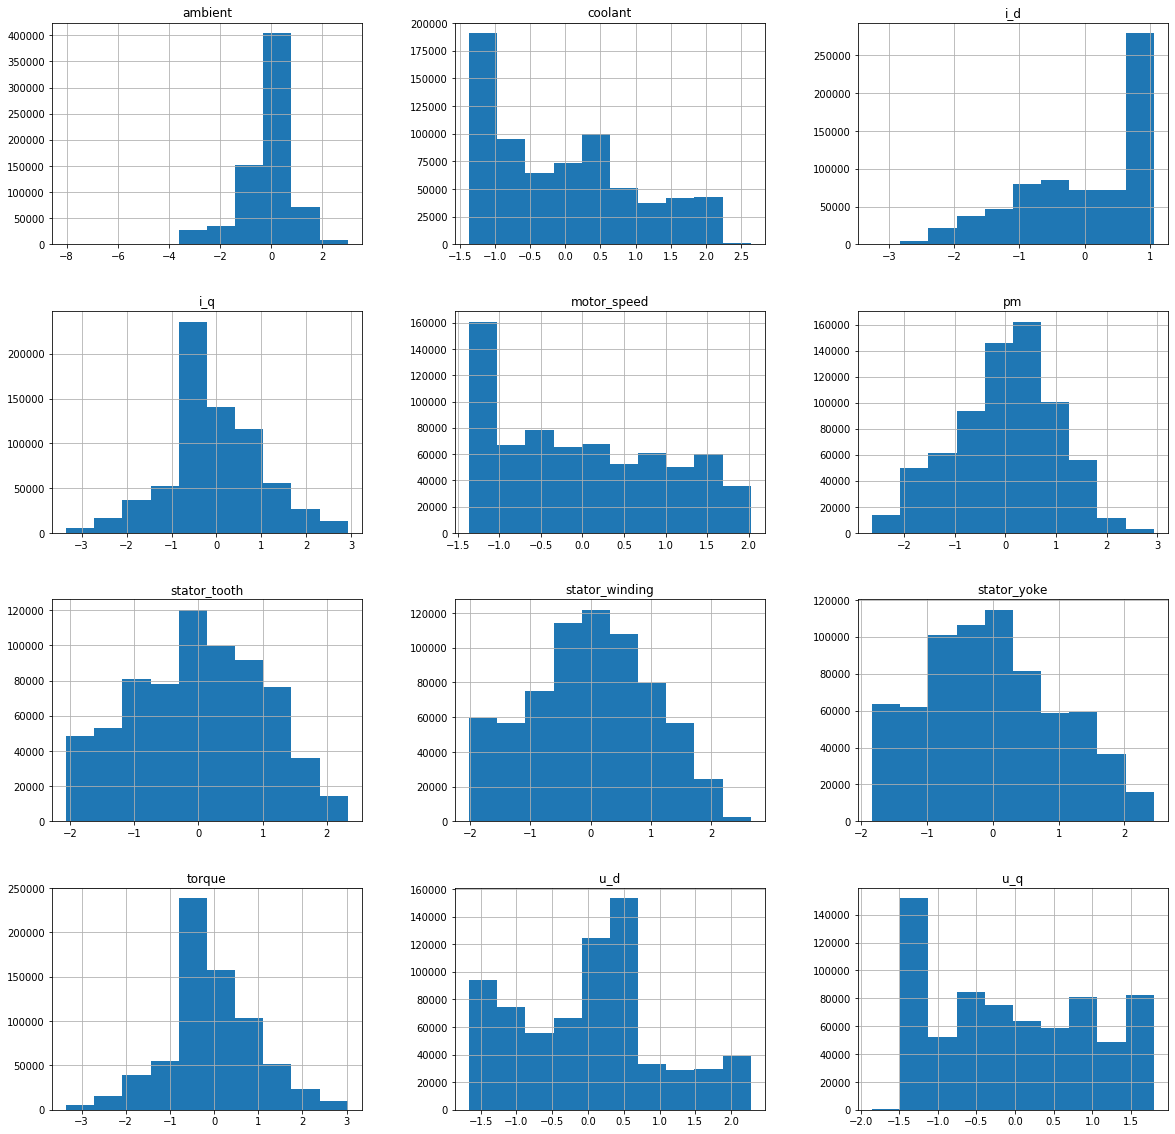

In [105]:
train_norm.hist(figsize = (20,20))
plt.show()

In [106]:
train_norm.head(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.754516,-1.120888,0.324398,-1.288941,-1.214340,-0.247841,1.024799,-0.243691,-2.529196,-1.829997,-2.064486,-2.017188
1,-0.785490,-1.119127,0.329245,-1.292896,-1.214340,-0.247088,1.024674,-0.243648,-2.529801,-1.828977,-2.062416,-2.016498
2,-0.783519,-1.119210,0.330175,-1.292926,-1.214342,-0.246291,1.028074,-0.244788,-2.528762,-1.828910,-2.061479,-2.016787
3,-0.776576,-1.119221,0.331685,-1.294189,-1.214341,-0.246356,1.027036,-0.244442,-2.529024,-1.829074,-2.061137,-2.017300
4,-0.765388,-1.119400,0.331380,-1.294088,-1.214341,-0.245851,1.026259,-0.244173,-2.529328,-1.830506,-2.060892,-2.017039
5,-0.740722,-1.116438,0.332738,-1.296221,-1.214344,-0.245975,1.025334,-0.243866,-2.529972,-1.830757,-2.060295,-2.016367
6,-0.729318,-1.111947,0.332469,-1.296698,-1.214343,-0.245948,1.024862,-0.243718,-2.529804,-1.830014,-2.060659,-2.017335
7,-0.706902,-1.112445,0.332723,-1.296884,-1.214346,-0.245655,1.024544,-0.243610,-2.529340,-1.830627,-2.060461,-2.016744
8,-0.684396,-1.113819,0.332045,-1.294310,-1.214342,-0.245164,1.024500,-0.243606,-2.529050,-1.830605,-2.060098,-2.016411
9,-0.621502,-1.116736,0.332390,-1.296740,-1.214342,-0.245537,1.024437,-0.243560,-2.529436,-1.830354,-2.059673,-2.016787


Text(0, 0.5, 'pm')

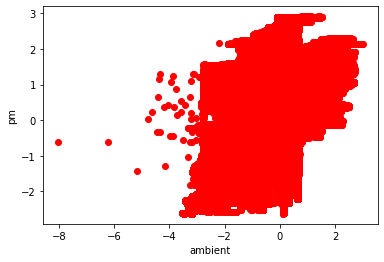

In [107]:
#finding dependency between variables using scatter plot
plt.plot(train_norm.ambient,traindata["pm"],"ro");plt.xlabel("ambient");plt.ylabel("pm")

Text(0, 0.5, 'pm')

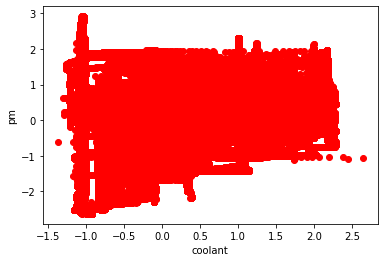

In [108]:
plt.plot(train_norm.coolant,traindata["pm"],"ro");plt.xlabel("coolant");plt.ylabel("pm")

Text(0, 0.5, 'pm')

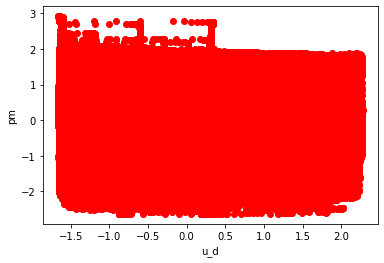

In [109]:
plt.plot(train_norm.u_d,traindata["pm"],"ro");plt.xlabel("u_d");plt.ylabel("pm")

Text(0, 0.5, 'pm')

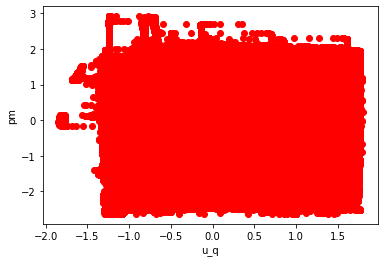

In [110]:
plt.plot(train_norm.u_q,traindata["pm"],"ro");plt.xlabel("u_q");plt.ylabel("pm")

Text(0, 0.5, 'pm')

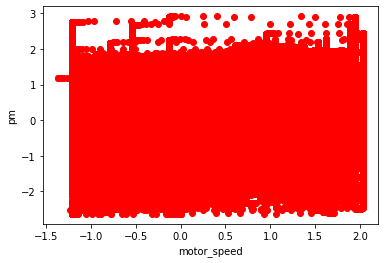

In [111]:
plt.plot(train_norm.motor_speed,traindata["pm"],"ro");plt.xlabel("motor_speed");plt.ylabel("pm")

Text(0, 0.5, 'pm')

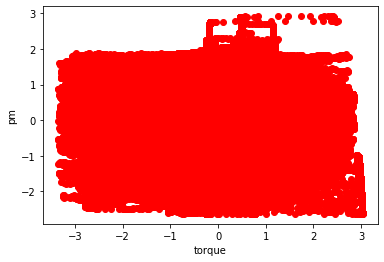

In [112]:
plt.plot(train_norm.torque,traindata["pm"],"ro");plt.xlabel("torque");plt.ylabel("pm")

Text(0, 0.5, 'pm')

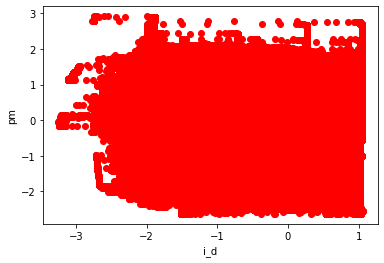

In [113]:
plt.plot(train_norm.i_d,traindata["pm"],"ro");plt.xlabel("i_d");plt.ylabel("pm")

Text(0, 0.5, 'pm')

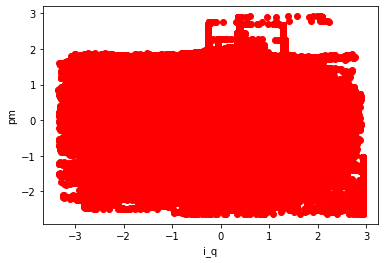

In [114]:
plt.plot(train_norm.i_q,traindata["pm"],"ro");plt.xlabel("i_q");plt.ylabel("pm")

Text(0, 0.5, 'pm')

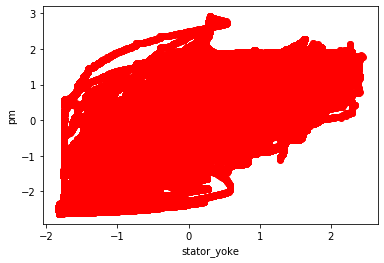

In [115]:
plt.plot(train_norm.stator_yoke,traindata["pm"],"ro");plt.xlabel("stator_yoke");plt.ylabel("pm")

Text(0, 0.5, 'pm')

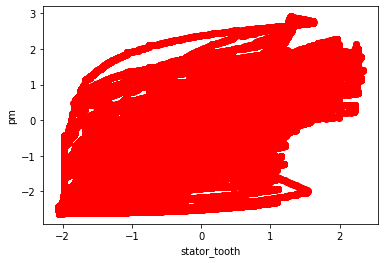

In [116]:
plt.plot(train_norm.stator_tooth,traindata["pm"],"ro");plt.xlabel("stator_tooth");plt.ylabel("pm")

Text(0, 0.5, 'pm')

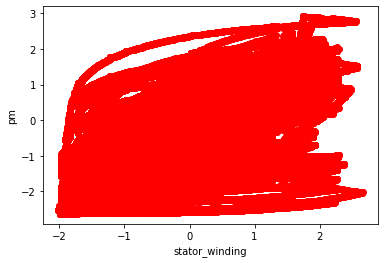

In [117]:
plt.plot(train_norm.stator_winding,traindata["pm"],"ro");plt.xlabel("stator_winding");plt.ylabel("pm")

In [8]:
from scipy import stats
z = np.abs(stats.zscore(train_norm))
print(z)

[[0.75451553 1.12088827 0.32439766 ... 1.82999731 2.06448615 2.01718768]
 [0.78549003 1.11912714 0.32924497 ... 1.82897676 2.0624158  2.0164975 ]
 [0.78351938 1.11920987 0.33017548 ... 1.82890963 2.06147934 2.01678665]
 ...
 [0.04604644 0.31458683 0.32817233 ... 1.01166175 0.83687477 0.49904405]
 [0.03950957 0.30200606 0.32741501 ... 1.0011635  0.83637274 0.49742853]
 [0.04097266 0.30724604 0.32729855 ... 0.98543759 0.83048115 0.49413981]]


In [9]:
threshold = 3
print(np.where(z>3))

(array([ 25398,  45234,  45235, ..., 695888, 695888, 695889], dtype=int64), array([0, 6, 6, ..., 5, 7, 7], dtype=int64))


In [10]:
train_nout=train_norm[(z<3).all(axis=1)]

In [11]:
np.shape(train_norm)

(698649, 12)

In [12]:
np.shape(train_nout)

(693061, 12)

In [13]:
q1=train_norm.quantile(0.25)
q3=train_norm.quantile(0.75)
IQR=q3-q1
print(IQR)

ambient           1.294315
coolant           1.682830
u_d               1.188792
u_q               1.776402
motor_speed       1.804236
torque            0.816182
i_d               1.772493
i_q               0.758884
pm                1.358233
stator_yoke       1.442892
stator_tooth      1.534712
stator_winding    1.453123
dtype: float64


In [14]:
print(train_norm < (q1 - 1.5*IQR)) | (train_norm > (q3 + 1.5*IQR))

        ambient  coolant    u_d    u_q  motor_speed  torque    i_d    i_q  \
0         False    False  False  False        False   False  False  False   
1         False    False  False  False        False   False  False  False   
2         False    False  False  False        False   False  False  False   
3         False    False  False  False        False   False  False  False   
4         False    False  False  False        False   False  False  False   
5         False    False  False  False        False   False  False  False   
6         False    False  False  False        False   False  False  False   
7         False    False  False  False        False   False  False  False   
8         False    False  False  False        False   False  False  False   
9         False    False  False  False        False   False  False  False   
10        False    False  False  False        False   False  False  False   
11        False    False  False  False        False   False  False  False   

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [16]:
train_noutiqr=train_norm[~((train_norm < (q1 - 1.5*IQR)) | (train_norm > (q3 + 1.5*IQR))).any(axis=1)]

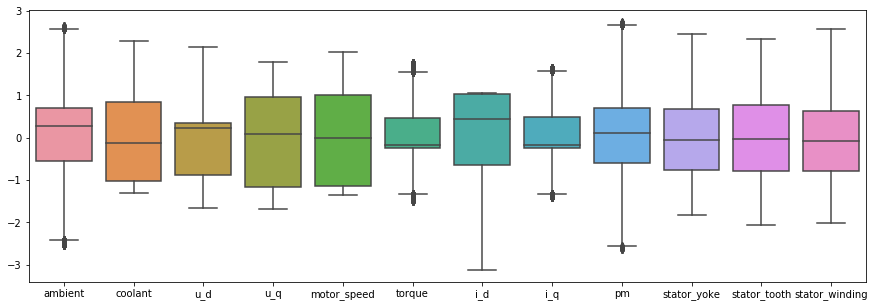

In [17]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=train_noutiqr)

In [127]:
np.shape(train_noutiqr)


(570755, 12)

In [128]:
train_noutiqr.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
ambient,1.000000,0.399104,0.148107,0.071162,0.035195,-0.161546,0.015193,-0.163306,0.395864,0.415436,0.364166,0.291525
coolant,0.399104,1.000000,0.179047,0.013503,-0.055528,-0.179664,0.110067,-0.175142,0.389324,0.882751,0.702839,0.538799
u_d,0.148107,0.179047,1.000000,-0.013419,-0.309868,-0.886630,0.538519,-0.845839,-0.172760,-0.009180,-0.152607,-0.262448
u_q,0.071162,0.013503,-0.013419,1.000000,0.725542,-0.054977,-0.283423,-0.037786,0.092239,0.128940,0.198520,0.204324
motor_speed,0.035195,-0.055528,-0.309868,0.725542,1.000000,0.107552,-0.821981,0.070876,0.328969,0.196700,0.378609,0.476022
torque,-0.161546,-0.179664,-0.886630,-0.054977,0.107552,1.000000,-0.392712,0.992636,0.064703,-0.034552,0.074168,0.171876
i_d,0.015193,0.110067,0.538519,-0.283423,-0.821981,-0.392712,1.000000,-0.327703,-0.353554,-0.175842,-0.387717,-0.534428
i_q,-0.163306,-0.175142,-0.845839,-0.037786,0.070876,0.992636,-0.327703,1.000000,0.037216,-0.046473,0.049560,0.137633
pm,0.395864,0.389324,-0.172760,0.092239,0.328969,0.064703,-0.353554,0.037216,1.000000,0.680604,0.781823,0.784086
stator_yoke,0.415436,0.882751,-0.009180,0.128940,0.196700,-0.034552,-0.175842,-0.046473,0.680604,1.000000,0.950249,0.855825


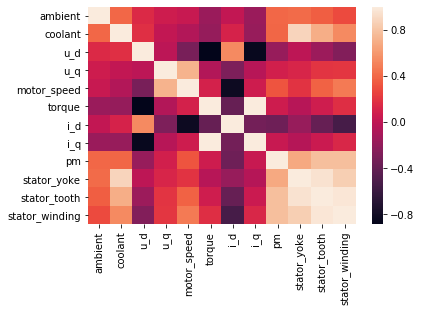

In [129]:
corr = train_noutiqr.corr()
ax = sns.heatmap(corr)

In [131]:
important_columns = corr.nlargest(10, 'pm').index
important_columns
#we can remove the columns u_d and i_d

Index(['pm', 'stator_winding', 'stator_tooth', 'stator_yoke', 'ambient',
       'coolant', 'motor_speed', 'u_q', 'torque', 'i_q'],
      dtype='object')

In [22]:
train_data=train_noutiqr

In [23]:
train_data.head(10)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.754516,-1.120888,0.324398,-1.288941,-1.214340,-0.247841,1.024799,-0.243691,-2.529196,-1.829997,-2.064486,-2.017188
1,-0.785490,-1.119127,0.329245,-1.292896,-1.214340,-0.247088,1.024674,-0.243648,-2.529801,-1.828977,-2.062416,-2.016498
2,-0.783519,-1.119210,0.330175,-1.292926,-1.214342,-0.246291,1.028074,-0.244788,-2.528762,-1.828910,-2.061479,-2.016787
3,-0.776576,-1.119221,0.331685,-1.294189,-1.214341,-0.246356,1.027036,-0.244442,-2.529024,-1.829074,-2.061137,-2.017300
4,-0.765388,-1.119400,0.331380,-1.294088,-1.214341,-0.245851,1.026259,-0.244173,-2.529328,-1.830506,-2.060892,-2.017039
5,-0.740722,-1.116438,0.332738,-1.296221,-1.214344,-0.245975,1.025334,-0.243866,-2.529972,-1.830757,-2.060295,-2.016367
6,-0.729318,-1.111947,0.332469,-1.296698,-1.214343,-0.245948,1.024862,-0.243718,-2.529804,-1.830014,-2.060659,-2.017335
7,-0.706902,-1.112445,0.332723,-1.296884,-1.214346,-0.245655,1.024544,-0.243610,-2.529340,-1.830627,-2.060461,-2.016744
8,-0.684396,-1.113819,0.332045,-1.294310,-1.214342,-0.245164,1.024500,-0.243606,-2.529050,-1.830605,-2.060098,-2.016411
9,-0.621502,-1.116736,0.332390,-1.296740,-1.214342,-0.245537,1.024437,-0.243560,-2.529436,-1.830354,-2.059673,-2.016787
